In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [81]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [82]:
list(df.columns)


['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [83]:
df.drop(columns="id",inplace=True)
df.drop(columns="ever_married",inplace=True)
df.drop(columns="work_type",inplace=True)
df.drop(columns="Residence_type",inplace=True)

In [84]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [85]:
df.shape

(5110, 8)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                4909 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


<ipython-input-87-73eb4983441b>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  g = df.hist(ax=ax)


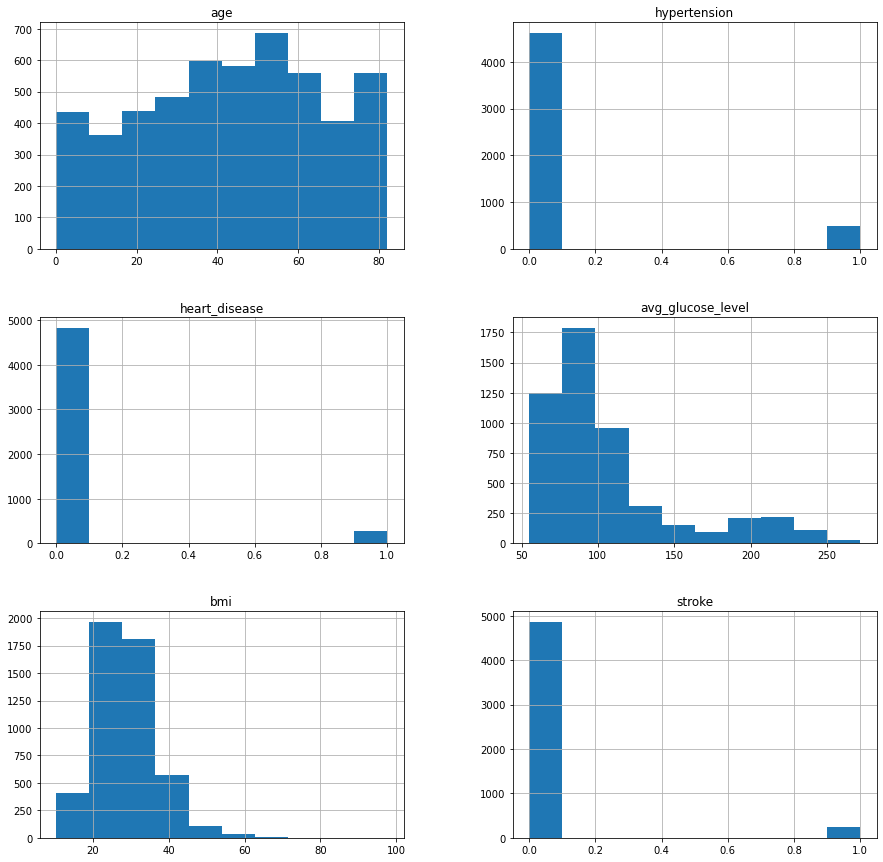

In [87]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

<AxesSubplot:xlabel='stroke', ylabel='count'>

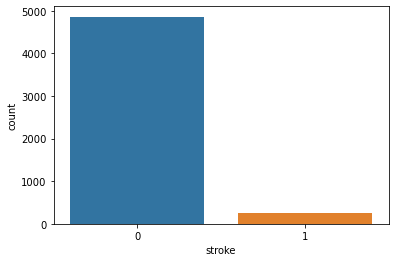

In [88]:
sns.countplot(x = 'stroke',data = df)

In [89]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [90]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1


In [91]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [92]:
catFeatures = ['gender', 'hypertension', 'heart_disease', 'smoking_status']
for catFeature in catFeatures:
    print(df[catFeature].unique())

['Male' 'Female' 'Other']
[0 1]
[1 0]
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


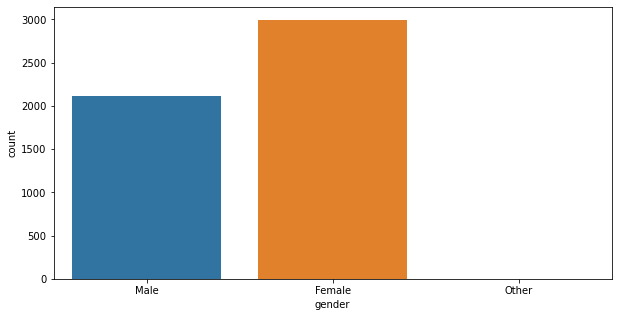

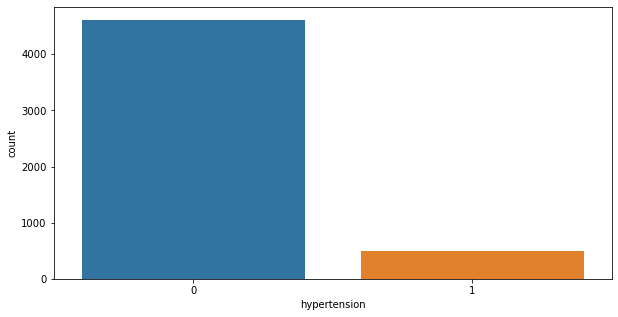

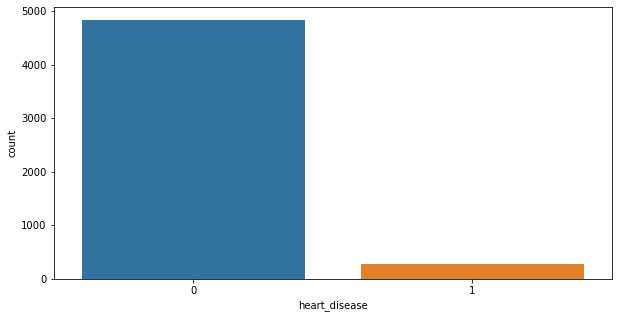

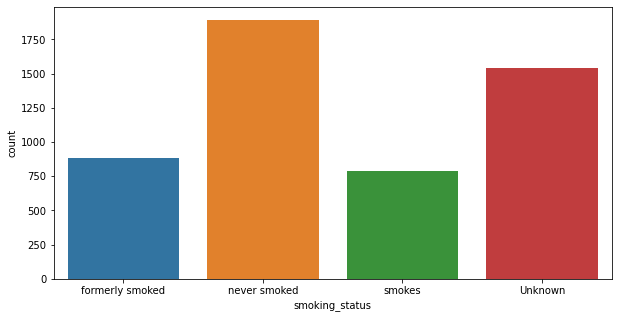

In [93]:
for catFeature in catFeatures:
    plt.figure(figsize=(10,5))
    sns.countplot(x = df[catFeature])
    plt.show()

In [94]:
df['gender']=df['gender'].map({'Female':0,'Male':1})
df['smoking_status']=df['smoking_status'].map({'never smoked':0,'smokes':1,'formerly smoked':2,'Unknown':3})

In [95]:
list(df.columns)

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [96]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,228.69,36.6,2,1
1,0.0,61.0,0,0,202.21,NaN,0,1
2,1.0,80.0,0,1,105.92,32.5,0,1
3,0.0,49.0,0,0,171.23,34.4,1,1
4,0.0,79.0,1,0,174.12,24.0,0,1


In [97]:
df.isnull().sum()

gender                 1
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [98]:
df = df.fillna(df['bmi'].mean())
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace = True)

In [101]:
X = df[["gender","age","hypertension","heart_disease","avg_glucose_level","bmi","smoking_status"]]
y = df["stroke"]

In [102]:
from imblearn.under_sampling import RandomUnderSampler

In [103]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_resampled, y_resampled, test_size=0.2)

In [105]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)


In [106]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The Training Score of RandomForestClassifier is: {:.3f}%".format(model_rf.score(x_train, y_train)*100))
print("The Confusion Matrix for RandomForestClassifier is: \n{}\n".format(confusion_matrix(y_test, y_pred)))
print("The Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
print("The Accuracy Score of RandomForestClassifier is: {:.3f}%".format(accuracy_score(y_test, y_pred)*100))

The Training Score of RandomForestClassifier is: 100.000%
The Confusion Matrix for RandomForestClassifier is: 
[[34 12]
 [14 40]]

The Classification report: 
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        46
           1       0.77      0.74      0.75        54

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100


The Accuracy Score of RandomForestClassifier is: 74.000%


In [107]:
from sklearn.model_selection import RandomizedSearchCV


In [108]:
Rand_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [117]:
Rand_search = RandomizedSearchCV(estimator=model_rf,param_distributions=Rand_param,cv=5,verbose = 3)

In [118]:
Rand_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=100;, score=0.700 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=100;, score=0.825 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=100;, score=0.812 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=100;, score=0.785 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=100;, score=0.797 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=130;, score=0.700 total time=   0.2s
[CV 2/5] END criterion=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]},
                   verbose=3)

In [119]:
Rand_search.best_params_

{'n_estimators': 115,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini'}

In [120]:
model_rf= RandomForestClassifier(n_estimators=115,
 min_samples_split=3,
 min_samples_leaf=1,
 max_features= 'auto',
 max_depth= 3,
 criterion= 'gini')

In [121]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=3, n_estimators=115)

In [122]:
y_pred=model_rf.predict(x_test)

In [123]:
acc=accuracy_score(y_pred,y_test)

In [124]:
acc

0.74

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [126]:
print("The Training Score of KNeighborsClassifier is: {:.3f}%".format(knn.score(x_train, y_train)*100))
print("The Confusion Matrix for KNeighborsClassifierr is: \n{}\n".format(confusion_matrix(y_test, y_pred)))
print("The Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
print("The Accuracy Score of KNeighborsClassifier is: {:.3f}%".format(accuracy_score(y_test, y_pred)*100))

The Training Score of KNeighborsClassifier is: 82.412%
The Confusion Matrix for KNeighborsClassifierr is: 
[[30 16]
 [12 42]]

The Classification report: 
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        46
           1       0.72      0.78      0.75        54

    accuracy                           0.72       100
   macro avg       0.72      0.71      0.72       100
weighted avg       0.72      0.72      0.72       100


The Accuracy Score of KNeighborsClassifier is: 72.000%


In [127]:
Rand_param =  { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [130]:
Rand_search = RandomizedSearchCV(estimator=knn,param_distributions=Rand_param,verbose = 3)

In [131]:
Rand_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=0.700 total time=   0.4s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=0.787 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=0.775 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=0.734 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=0.772 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.700 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.775 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.762 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.696 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.734 total time=   0.0s
[CV 1/5] 

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [18, 20, 25, 27, 30, 32,
                                                      34],
                                        'n_neighbors': [3, 5, 7, 9, 10, 11, 12,
                                                        13]},
                   verbose=3)

In [132]:
Rand_search.best_params_

{'n_neighbors': 13, 'leaf_size': 20, 'algorithm': 'brute'}

In [133]:
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size =20, n_neighbors =13)

In [134]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=20, n_neighbors=13)

In [135]:
knn.score(x_train,y_train)

0.7914572864321608

In [136]:
knn.score(x_test,y_test)

0.73

In [137]:
print("The Confusion Matrix for knnClassifier is: \n{}\n".format(confusion_matrix(y_test, y_pred)))


The Confusion Matrix for knnClassifier is: 
[[30 16]
 [12 42]]



In [138]:
y_score1 = Rand_search.predict_proba(x_test)[:,1]
y_score2 = knn.predict_proba(x_test)[:,1]

In [139]:
from sklearn.metrics import roc_auc_score

In [53]:
print('roc_auc_score for Random forest: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score2))

roc_auc_score for Random forest:  0.7163050134895808
roc_auc_score for KNN:  0.7163050134895808


In [140]:
from xgboost import XGBClassifier

In [142]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(x_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
model.score(x_test,y_test)

0.68

In [144]:
import scipy.stats as stats

In [145]:
param_dist = {'n_estimators':[90,100,115,130],
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

In [148]:
clf = RandomizedSearchCV(model, param_distributions = param_dist, n_iter = 25, scoring = 'accuracy', error_score = 0, verbose = 3)


In [149]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    Will return a dict of floats if `scorer` is a dict, otherwise a single
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    retur

[CV 1/5] END colsample_bytree=1.3492577762275118, learning_rate=0.4899137984117142, max_depth=3, min_child_weight=1, n_estimators=90, subsample=0.4088374535565672;, score=0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=1.3492577762275118, learning_rate=0.4899137984117142, max_depth=3, min_child_weight=1, n_estimators=90, subsample=0.4088374535565672;, score=0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=1.3492577762275118, learning_rate=0.4899137984117142, max_depth=3, min_child_weight=1, n_estimators=90, subsample=0.4088374535565672;, score=0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=1.3492577762275118, learning_rate=0.4899137984117142, max_depth=3, min_child_weight=1, n_estimators=90, subsample=0.4088374535565672;, score=0.000 total time=   0.0s
[CV 5/5] END colsample_bytree=1.3492577762275118, learning_rate=0.4899137984117142, max_depth=3, min_child_weight=1, n_estimators=90, subsample=0.4088374535565672;, score=0.000 total time=   0.0s
[17:08:34] WARNING: 

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.7804529544642649, learning_rate=0.2934170571800207, max_depth=9, min_child_weight=3, n_estimators=90, subsample=0.342166986259245;, score=0.812 total time=   0.0s
[17:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.7804529544642649, learning_rate=0.2934170571800207, max_depth=9, min_child_weight=3, n_estimators=90, subsample=0.342166986259245;, score=0.825 total tim

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label 


[17:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.7804529544642649, learning_rate=0.2934170571800207, max_depth=9, min_child_weight=3, n_estimators=90, subsample=0.342166986259245;, score=0.797 total time=   0.0s
[17:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.9716102719210801, learning_rate=0.18010444113896965, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9595756191564062;, score=0.713 total

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label 

[17:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.9716102719210801, learning_rate=0.18010444113896965, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.9595756191564062;, score=0.772 total time=   0.0s
[CV 1/5] END colsample_bytree=1.1620361787725946, learning_rate=0.23819453586637715, max_depth=4, min_child_weight=1, n_estimators=90, subsample=0.9297965372874064;, score=0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=1.1620361787725946, learning_rate=0.23819453586637715, max_depth=4, min_child_weight=1, n_estimators=90, subsample=0.9297965372874064;, score=0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=1.1620361787725946, learning_rate=0.23819453586637715, max_depth=4, 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    Will return a dict of floats if `scorer` is a dict, otherwise a single
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    return f(**kwargs)
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\training.py", line 227, in train
    bst = _train_internal(params, dtrain,
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\training.py", line 102, in _train_internal
    bst.update(dtrain, i, obj)
  File "C:\Users\Dell\anaconda3

[CV 2/5] END colsample_bytree=1.2071276345075468, learning_rate=0.5475878165368147, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7066870444264644;, score=0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=1.2071276345075468, learning_rate=0.5475878165368147, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7066870444264644;, score=0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=1.2071276345075468, learning_rate=0.5475878165368147, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7066870444264644;, score=0.000 total time=   0.0s
[CV 5/5] END colsample_bytree=1.2071276345075468, learning_rate=0.5475878165368147, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7066870444264644;, score=0.000 total time=   0.0s
[CV 1/5] END colsample_bytree=1.1774119537346377, learning_rate=0.07810363535108332, max_depth=3, min_child_weight=1, n_estimators=130, subsample=0.9833190324620436;, score=0.000 total time=   0.0s
[CV 2/5] END c

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    Will return a dict of floats if `scorer` is a dict, otherwise a single
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    retur

[CV 5/5] END colsample_bytree=1.197555296501808, learning_rate=0.034433848733885365, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.7205657199837843;, score=0.000 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0228217651171327, learning_rate=0.26216609951031444, max_depth=8, min_child_weight=2, n_estimators=90, subsample=0.3542342547296248;, score=0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0228217651171327, learning_rate=0.26216609951031444, max_depth=8, min_child_weight=2, n_estimators=90, subsample=0.3542342547296248;, score=0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0228217651171327, learning_rate=0.26216609951031444, max_depth=8, min_child_weight=2, n_estimators=90, subsample=0.3542342547296248;, score=0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=1.0228217651171327, learning_rate=0.26216609951031444, max_depth=8, min_child_weight=2, n_estimators=90, subsample=0.3542342547296248;, score=0.000 total time=   0.0s
[CV 5/5] END c

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    Will return a dict of floats if `scorer` is a dict, otherwise a single
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    retur

[CV 3/5] END colsample_bytree=1.360207122136352, learning_rate=0.16424846491029846, max_depth=4, min_child_weight=4, n_estimators=90, subsample=0.5730510369161258;, score=0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=1.360207122136352, learning_rate=0.16424846491029846, max_depth=4, min_child_weight=4, n_estimators=90, subsample=0.5730510369161258;, score=0.000 total time=   0.0s
[CV 5/5] END colsample_bytree=1.360207122136352, learning_rate=0.16424846491029846, max_depth=4, min_child_weight=4, n_estimators=90, subsample=0.5730510369161258;, score=0.000 total time=   0.0s
[17:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.9852573585954923, learning_rate=0.5834255768353324, max_depth=3, min_c

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label 


[17:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.9852573585954923, learning_rate=0.5834255768353324, max_depth=3, min_child_weight=4, n_estimators=115, subsample=0.7993664549892479;, score=0.772 total time=   0.0s
[CV 1/5] END colsample_bytree=1.0054072384345876, learning_rate=0.4172711316912341, max_depth=3, min_child_weight=3, n_estimators=130, subsample=0.38773222892528325;, score=0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=1.0054072384345876, learning_rate=0.4172711316912341, max_depth=3, min_child_weight=3, n_estimators=130, subsample=0.38773222892528325;, score=0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=1.0054072384345876, learning_rate=0.4172711316912341, max_depth=3,

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    Will return a dict of floats if `scorer` is a dict, otherwise a single
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    retur

[CV 1/5] END colsample_bytree=0.7367807801354228, learning_rate=0.5621678056943338, max_depth=9, min_child_weight=3, n_estimators=115, subsample=0.699691140722458;, score=0.713 total time=   0.0s
[17:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.7367807801354228, learning_rate=0.5621678056943338, max_depth=9, min_child_weight=3, n_estimators=115, subsample=0.699691140722458;, score=0.800 total time=   0.0s


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.7367807801354228, learning_rate=0.5621678056943338, max_depth=9, min_child_weight=3, n_estimators=115, subsample=0.699691140722458;, score=0.787 total time=   0.0s
[17:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.7367807801354228, learning_rate=0.5621678056943338, max_depth=9, min_child_weight=3, n_estimators=115, subsample=0.699691140722458;, score=0.848 total t

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedW

[17:08:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.7367807801354228, learning_rate=0.5621678056943338, max_depth=9, min_child_weight=3, n_estimators=115, subsample=0.699691140722458;, score=0.722 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5071301249949955, learning_rate=0.5506061004845505, max_depth=9, min_child_weight=3, n_estimators=90, subsample=1.0214181834507325;, score=0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.5071301249949955, learning_rate=0.5506061004845505, max_depth=9, min_child_weight=3, n_estimators=90, subsample=1.0214181834507325;, score=0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.5071301249949955, learning_rate=0.5506061004845505, max_depth=9, min_c

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/5] END colsample_bytree=0.5691416992843472, learning_rate=0.32675134983123727, max_depth=9, min_child_weight=2, n_estimators=115, subsample=0.9052494645755156;, score=0.637 total time=   0.0s
[17:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5691416992843472, learning_rate=0.32675134983123727, max_depth=9, min_child_weight=2, n_estimators=115, subsample=0.9052494645755156;, score=0.775 total time=   0.0s
[17:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore th

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/5] END colsample_bytree=0.5691416992843472, learning_rate=0.32675134983123727, max_depth=9, min_child_weight=2, n_estimators=115, subsample=0.9052494645755156;, score=0.750 total time=   0.0s
[17:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5691416992843472, learning_rate=0.32675134983123727, max_depth=9, min_child_weight=2, n_estimators=115, subsample=0.9052494645755156;, score=0.747 total time=   0.0s
[17:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore th

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 5/5] END colsample_bytree=0.5691416992843472, learning_rate=0.32675134983123727, max_depth=9, min_child_weight=2, n_estimators=115, subsample=0.9052494645755156;, score=0.722 total time=   0.0s
[17:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5931747855039357, learning_rate=0.419720094297598, max_depth=3, min_child_weight=1, n_estimators=130, subsample=0.6899509745158101;, score=0.713 total time=   0.0s
[17:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the 

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[17:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5931747855039357, learning_rate=0.419720094297598, max_depth=3, min_child_weight=1, n_estimators=130, subsample=0.6899509745158101;, score=0.775 total time=   0.0s
[17:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 4/5] END colsample_bytree=0.5931747855039357, learning_rate=0.419720094297598, max_depth=3, min_child_weight=1, n_estimators=130, subsample=0.6899509745158101;, score=0.772 total time=   0.0s
[17:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5931747855039357, learning_rate=0.419720094297598, max_depth=3, min_child_weight=1, n_estimators=130, subsample=0.6899509745158101;, score=0.734 total time=   0.0s
[17:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the ol

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label 


[17:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.6480681451590187, learning_rate=0.2829787432577512, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9598859507631334;, score=0.800 total time=   0.0s
[17:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.6480681451590187, learning_rate=0.2829787432577512, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9598859507631334;, score=0.787 tota

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label 


[CV 4/5] END colsample_bytree=0.6480681451590187, learning_rate=0.2829787432577512, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9598859507631334;, score=0.823 total time=   0.0s
[17:08:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.6480681451590187, learning_rate=0.2829787432577512, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9598859507631334;, score=0.709 total time=   0.0s
[CV 1/5] END colsample_bytree=1.1815482375712492, learning_rate=0.5681790625203686, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7559122244951471;, score=0.000 total time=   0.0s


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    Will return a dict of floats if `scorer` is a dict, otherwise a single
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    retur

[CV 2/5] END colsample_bytree=1.1815482375712492, learning_rate=0.5681790625203686, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7559122244951471;, score=0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=1.1815482375712492, learning_rate=0.5681790625203686, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7559122244951471;, score=0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=1.1815482375712492, learning_rate=0.5681790625203686, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7559122244951471;, score=0.000 total time=   0.0s
[CV 5/5] END colsample_bytree=1.1815482375712492, learning_rate=0.5681790625203686, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7559122244951471;, score=0.000 total time=   0.0s
[CV 1/5] END colsample_bytree=0.5181965196697481, learning_rate=0.2913399236885742, max_depth=7, min_child_weight=1, n_estimators=130, subsample=1.063247575764211;, score=0.000 total time=   0.0s
[CV 2/5] END col

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label 


[17:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5075052250334837, learning_rate=0.32896390475381615, max_depth=3, min_child_weight=4, n_estimators=115, subsample=0.8496426683567186;, score=0.785 total time=   0.0s
[17:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedW

[CV 5/5] END colsample_bytree=0.5075052250334837, learning_rate=0.32896390475381615, max_depth=3, min_child_weight=4, n_estimators=115, subsample=0.8496426683567186;, score=0.759 total time=   0.0s
[CV 1/5] END colsample_bytree=1.3894830147805588, learning_rate=0.49034609482256486, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.5805771112210707;, score=0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=1.3894830147805588, learning_rate=0.49034609482256486, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.5805771112210707;, score=0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=1.3894830147805588, learning_rate=0.49034609482256486, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.5805771112210707;, score=0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=1.3894830147805588, learning_rate=0.49034609482256486, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.5805771112210707;, score=0.000 total time=   0.0s
[CV 5/5] E

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    Will return a dict of floats if `scorer` is a dict, otherwise a single
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    retur

[CV 1/5] END colsample_bytree=0.9768342330413268, learning_rate=0.4449872304823313, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.736630464770127;, score=0.713 total time=   0.0s
[17:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.9768342330413268, learning_rate=0.4449872304823313, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.736630464770127;, score=0.787 total time=   0.0s
[17:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the ol

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label 

[17:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.9768342330413268, learning_rate=0.4449872304823313, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.736630464770127;, score=0.823 total time=   0.0s
[17:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.9768342330413268, learning_rate=0.4449872304823313, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.736630464770127;, score=0.722 total t

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    Will return a dict of floats if `scorer` is a dict, otherwise a single
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\core.py", line 422, in inner_f
    retur

[CV 1/5] END colsample_bytree=0.7103219354625228, learning_rate=0.4095561264170261, max_depth=9, min_child_weight=2, n_estimators=130, subsample=1.1690805830715651;, score=0.000 total time=   0.0s
[CV 2/5] END colsample_bytree=0.7103219354625228, learning_rate=0.4095561264170261, max_depth=9, min_child_weight=2, n_estimators=130, subsample=1.1690805830715651;, score=0.000 total time=   0.0s
[CV 3/5] END colsample_bytree=0.7103219354625228, learning_rate=0.4095561264170261, max_depth=9, min_child_weight=2, n_estimators=130, subsample=1.1690805830715651;, score=0.000 total time=   0.0s
[CV 4/5] END colsample_bytree=0.7103219354625228, learning_rate=0.4095561264170261, max_depth=9, min_child_weight=2, n_estimators=130, subsample=1.1690805830715651;, score=0.000 total time=   0.0s
[CV 5/5] END colsample_bytree=0.7103219354625228, learning_rate=0.4095561264170261, max_depth=9, min_child_weight=2, n_estimators=130, subsample=1.1690805830715651;, score=0.000 total time=   0.0s
[CV 1/5] END co

RandomizedSearchCV(error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E6FD1FE0A0>,
                                        'lea

In [150]:
clf.best_params_

{'colsample_bytree': 0.7804529544642649,
 'learning_rate': 0.2934170571800207,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 90,
 'subsample': 0.342166986259245}

In [151]:
Xgboost_clf = XGBClassifier(colsample_bytree=  0.7804529544642649,
 learning_rate= 0.2934170571800207,
 max_depth=9,
 min_child_weight= 3,
 n_estimators= 90,
 subsample= 0.342166986259245)

In [152]:
Xgboost_clf.fit(x_train,y_train)

[17:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7804529544642649, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.2934170571800207, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=90, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.342166986259245, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [153]:
y_pred1=Xgboost_clf.predict(x_test)

In [154]:
acc1=accuracy_score(y_pred1,y_test)
acc1

0.71

In [155]:
cm1=confusion_matrix(y_pred1,y_test)
cm1

array([[34, 17],
       [12, 37]], dtype=int64)

In [157]:
y_score1 = Xgboost_clf.predict_proba(x_test)[:,1]
y_score2 = model_rf.predict_proba(x_test)[:,1]

In [158]:
from sklearn.metrics import roc_curve

In [159]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

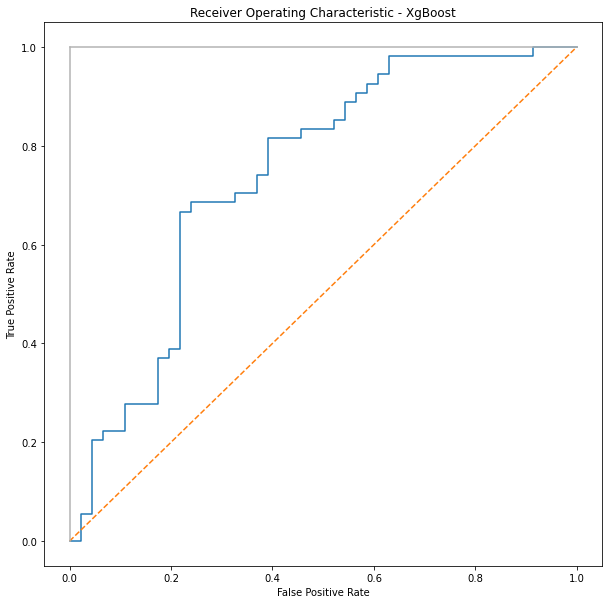

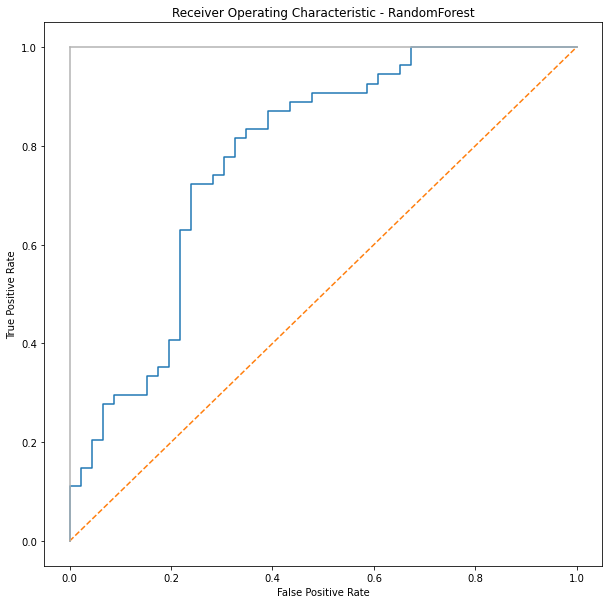

In [160]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XgBoost')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [161]:
from sklearn.metrics import roc_auc_score
print('roc_auc_score for XgBoost: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score2))

roc_auc_score for XgBoost:  0.7407407407407408
roc_auc_score for Random Forest:  0.7745571658615137


In [162]:
import pickle


In [164]:
with open(r'E:\College Project\Deployment Folders\Heart Disease Deployment'+ '/stroke.pkl', 'wb') as f:
    pickle.dump(model_rf,f)